# histogrammes de couleur pour toutes les images, par catégorie
Ce notebook vise à explorer les caractéristiques visuelles des images associées à différents produits en analysant les distributions de couleur.

### Lecture de la configuration pour obtenir les chemins de base des dossiers de données et d'images.

In [1]:
import configparser
config = configparser.ConfigParser()
config.read('../Rakuten_config2.ini')
def get_RACINE_DOSSIER() :
    return config['DOSSIER']['RACINE_DOSSIER']
def get_RACINE_IMAGES() :
    return config['DOSSIER']['RACINE_IMAGES']
print( get_RACINE_DOSSIER())
print( get_RACINE_IMAGES())

../input/
../data/images/image_train/


### importation de bibliothèques

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

### Chargement des Données

In [3]:
# lecture des données sources d'entrainement
df_feats=pd.read_csv(get_RACINE_DOSSIER() + 'X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv(get_RACINE_DOSSIER() + 'Y_train_CVw08PX.csv')


# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
cat=df_target['prdtypecode'].sort_values().unique()
cat
nomenclature=pd.read_csv(get_RACINE_DOSSIER() + 'NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']

#### Aperçu des données 

In [4]:
df_feats.head(5)
cat=df_target['prdtypecode'].sort_values().unique()

In [5]:
df_target.head(5)

,Unnamed: 0,prdtypecode
0,0,10
1,1,2280
2,2,50
3,3,1280
4,4,2705


#### Création de noms d'image et copie du DataFrame :
Ajout d'une colonne nom_image pour nommer les fichiers d'images basés sur imageid et productid,  
puis création d'une copie du DataFrame pour une utilisation future.

In [6]:
df['nom_image']=df.apply(lambda row: "image_" +  str(row['imageid']) 
                                     + "_product_" + str(row['productid']) + ".jpg",axis=1)
print("Nb enreg ", str(df.shape[0]))
df.head(5)
df_img=df.copy()

Nb enreg  84916


#### Chargement des images 

    Id                                        designation  \
2    2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
31  31                                X-Men 3 - The Movie   
34  34                              The Lord Or Thé Rings   
47  47       Shin Masoukishin Panzer Warfare (Import Jap)   
50  50                             Jeu Pc Cd-Rom : Azteca   

                                          description   productid     imageid  \
2   PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
31                                                NaN    49132716   874730792   
34                                                NaN  4237073471  1324384878   
47                                                NaN     8870838   868167157   
50                                                NaN  4232229083  1322918708   

    prdtypecode                                nom_image  
2            50    image_938777978_product_201115110.jpg  
31           40     image_87

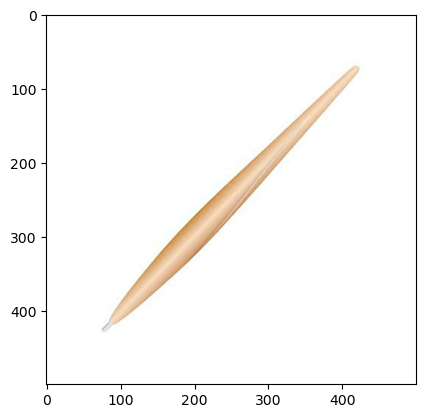

In [11]:
import os
import cv2
import numpy as np

from PIL import Image

# Définir le chemin du dossier contenant les images
folder_path = get_RACINE_IMAGES()
#folder_path = "C:\\Users\\DESPLANCHES.DOMAMP\\Datascientest\\images\\image_train"
#folder_path = "C:\\Users\\shaky\\anaconda3\\envs\\Datascientest\\Datascience\\PROJET\\images\\image_train"
df_img=df[df['prdtypecode'].isin([40,50])]
#df_img=df.copy()
print(df_img.head())

# Charger les images et les stocker dans un tableau
image_list = []

for filename in df_img['nom_image']:    
    #print(filename)
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        image_list.append(img)



# Convertir la liste d'images en un tableau numpy
images = np.array(image_list)
print(len(images))
print(images.shape)


# Afficher la première image
image=images[0,:,:,:]
plt.imshow(image)
plt.show()




#### Affichage de plusieurs images 

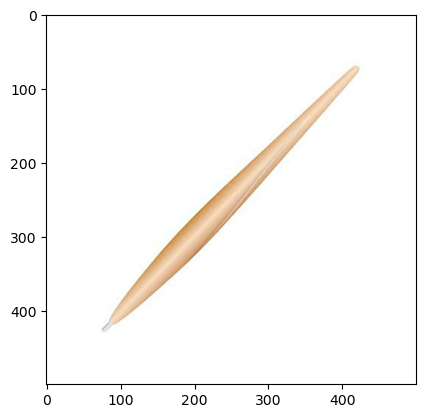

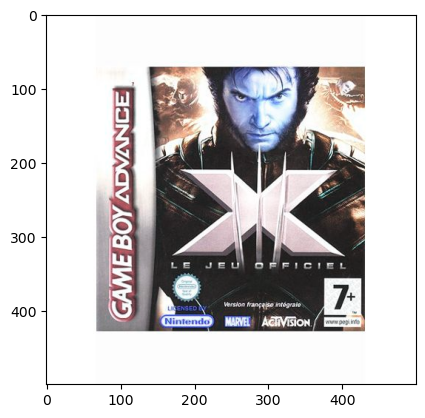

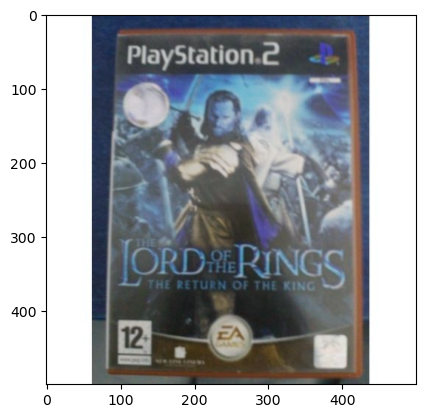

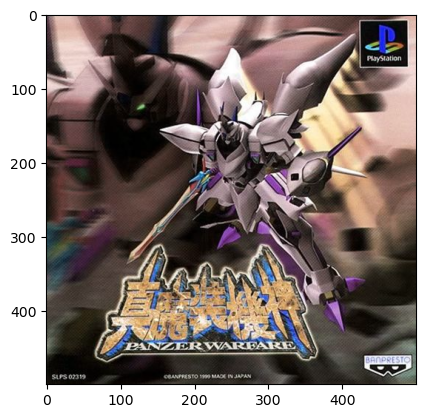

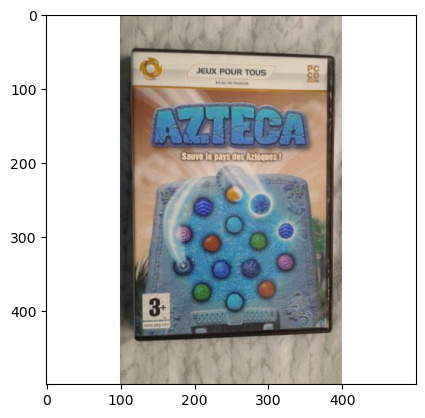

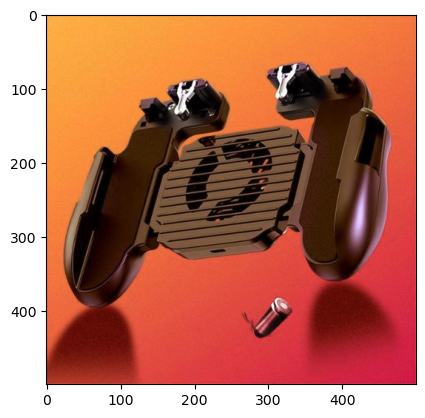

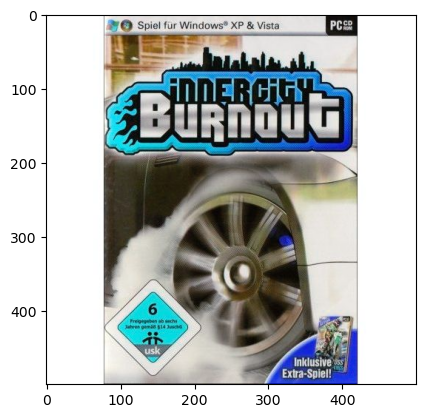

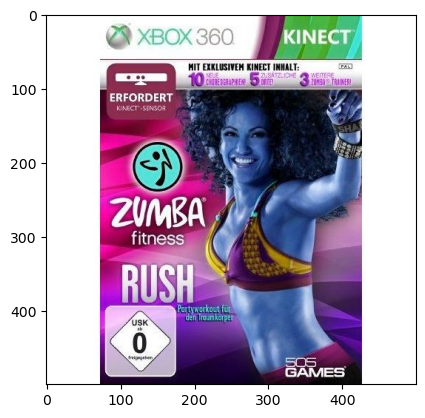

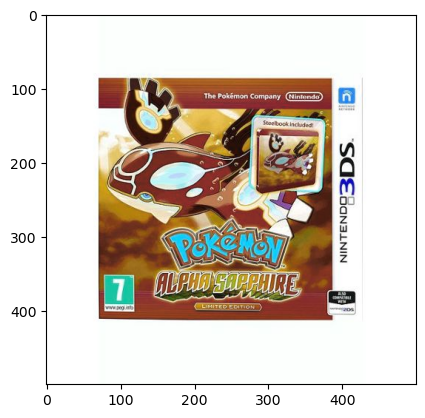

In [12]:
for i in range(9):
    image=images[i,:,:,:]
    plt.imshow(image)
    plt.show()

####  Calcul et affichage des histogrammes de couleur

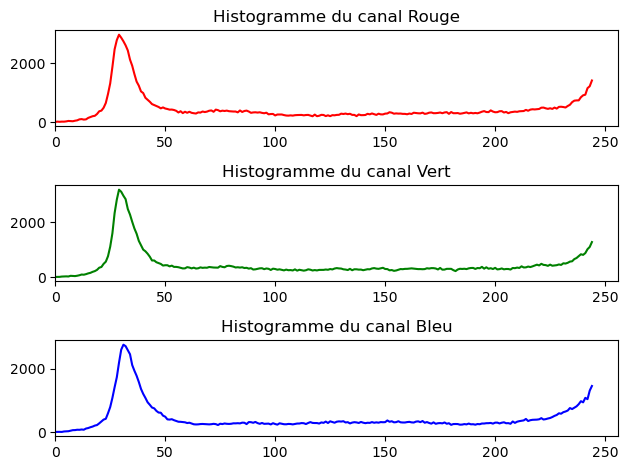

In [13]:
image=images[1,:,:,:]
# Conversion de l'image de BGR à RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Calcul des histogrammes par canal de couleur
histogram_red = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
histogram_green = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
histogram_blue = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# Affichage des histogrammes
plt.figure()

plt.subplot(3, 1, 1)
plt.plot(histogram_red[5:250], color='red')
plt.title("Histogramme du canal Rouge")
plt.xlim([0, 256])

plt.subplot(3, 1, 2)
plt.plot(histogram_green[5:250], color='green')
plt.title("Histogramme du canal Vert")
plt.xlim([0, 256])

plt.subplot(3, 1, 3)
plt.plot(histogram_blue[5:250], color='blue')
plt.title("Histogramme du canal Bleu")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

In [14]:
print(image.shape)
print(image_rgb.shape)

(500, 500, 3)
(500, 500, 3)


In [15]:
print(cat)

[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]


### Calcul des histogrammes pour toutes les catégories

In [18]:
folder_path = get_RACINE_IMAGES()
#folder_path = "C:\\Users\\shaky\\anaconda3\\envs\\Datascientest\\Datascience\\PROJET\\images\\image_train"
Dfhisto=pd.DataFrame()
for c in cat:
    print(c)
    image_list = []
    for filename in df[df['prdtypecode']==c]['nom_image']:
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            image_list.append(img)
    images = np.array(image_list)
    shapes = []
    print("Nb images",len(images))
    #for i in range(len(images[:5])):
    for i in range(len(images)):    
        image=images[i,:,:,:]
        #plt.imshow(image)
        #plt.show()
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Calcul des histogrammes par canal de couleur
        histogram_red = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
        histogram_green = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
        histogram_blue = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])
        
        histogram_red[:6]=0
        histogram_red[250:]=0
        histogram_blue[:6]=0
        histogram_blue[250:]=0
        histogram_green[:6]=0
        histogram_green[250:]=0
        shapes.append((c,'red',histogram_red))
        shapes.append((c,'green',histogram_green))
        shapes.append((c,'blue',histogram_blue))
        
        
    if len(Dfhisto) == 0 :
        Dfhisto =pd.DataFrame(shapes, columns=['prdtypecode','color','histo'])    
    else:
        #print(shapes)
        Dfhisto = pd.concat([Dfhisto,pd.DataFrame(shapes, columns=['prdtypecode','color','histo']) ]
                                  ,ignore_index=True,axis=0)
print(Dfhisto.head())    


10
Nb images 3116
40
Nb images 2508
50
Nb images 1681
60
Nb images 832
1140
Nb images 2671
1160
Nb images 3953
1180
Nb images 764
1280
Nb images 4870
1281
Nb images 2070
1300
Nb images 5045
1301
Nb images 807
1302
Nb images 2491
1320
Nb images 3241
1560
Nb images 5073
1920
Nb images 4303
1940
Nb images 803
2060
Nb images 4993
2220
Nb images 824
2280
Nb images 4760
2403
Nb images 4774
2462
Nb images 1421
2522
Nb images 4989
2582
Nb images 2589
2583
Nb images 10209
2585
Nb images 2496
2705
Nb images 2761
2905
Nb images 872
   prdtypecode  color                                              histo
0           10    red  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
1           10  green  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1....
2           10   blue  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
3           10    red  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [80...
4           10  green  [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [39...


#### Visualisation des histogrammes moyens par catégorie 

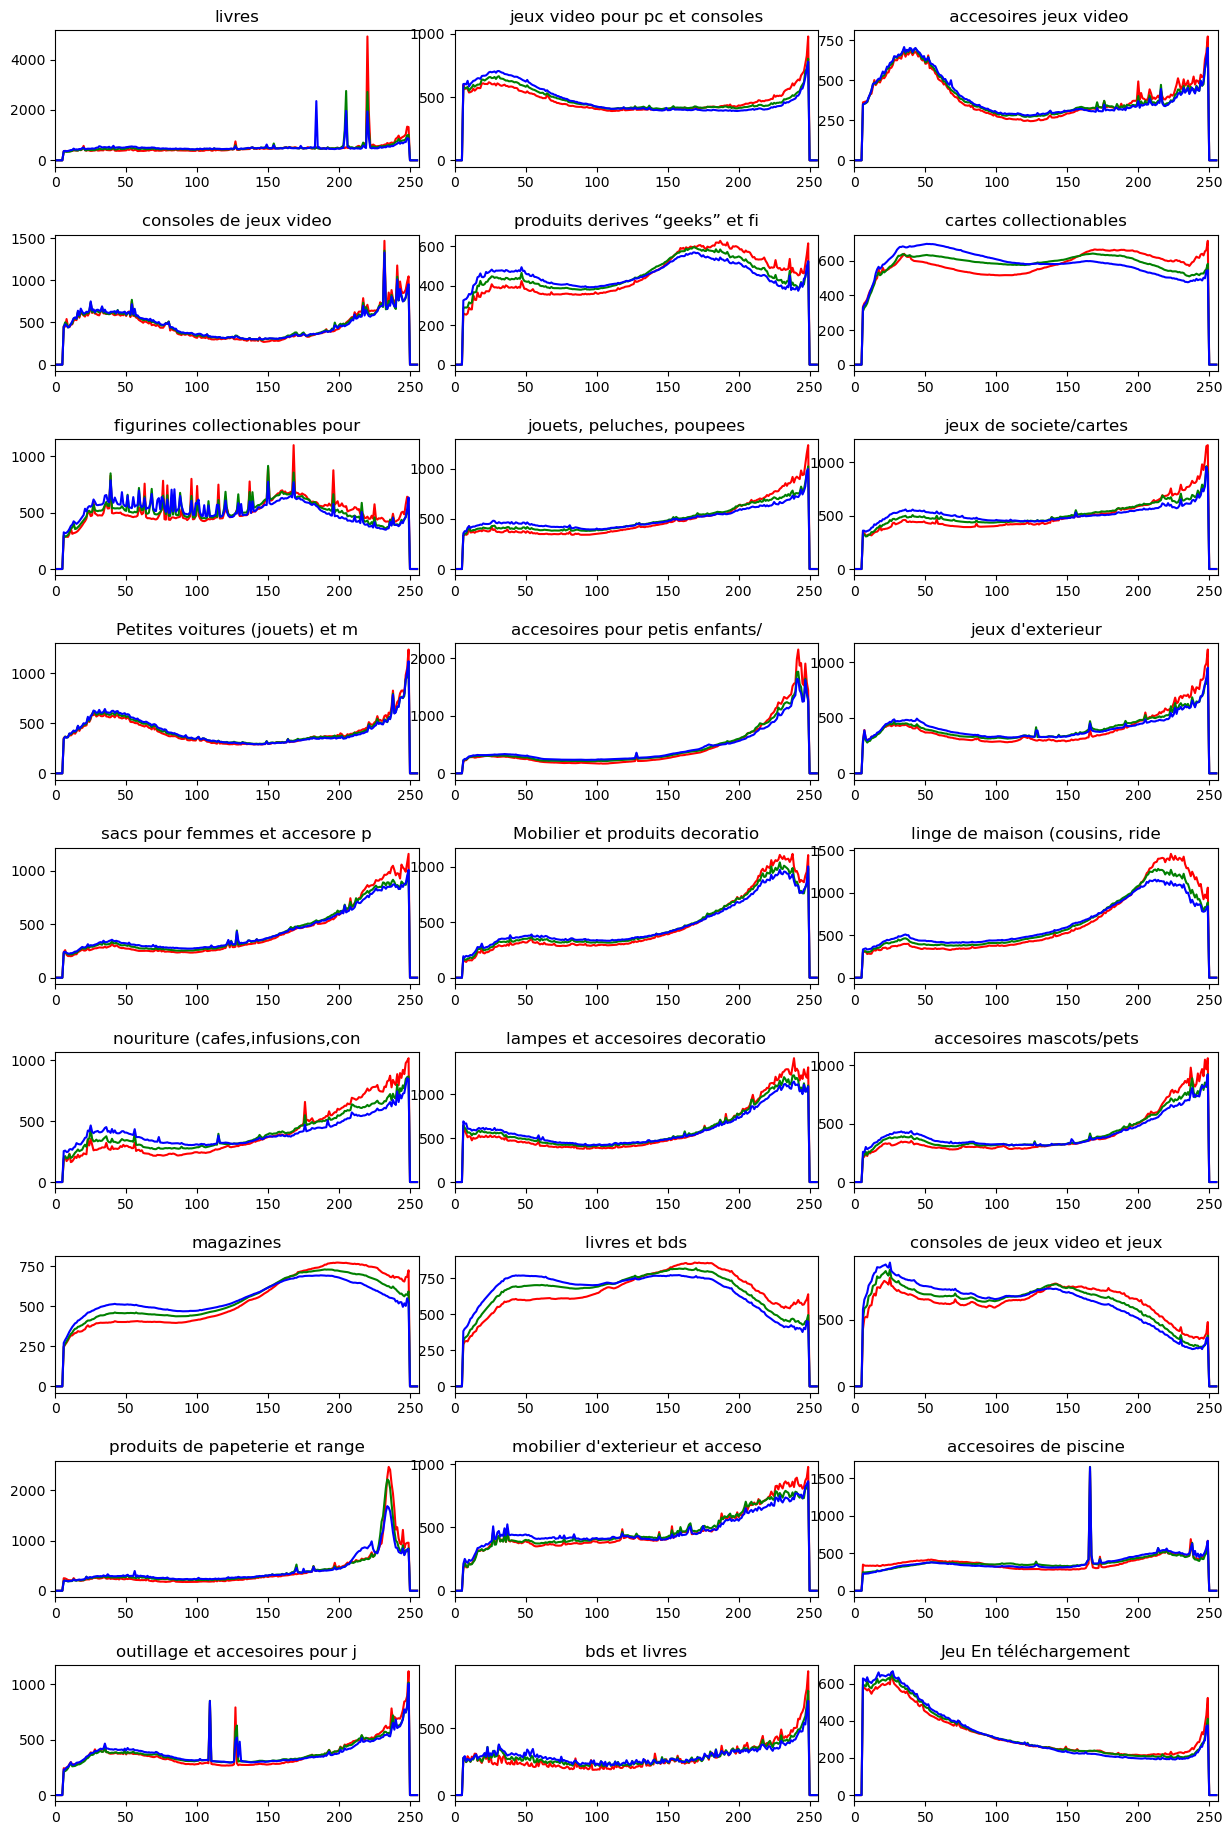

In [19]:
fig, axs = plt.subplots(9, 3, figsize=(15,23))
for c,ax in zip(cat,axs.flat):
    dfred=Dfhisto[(Dfhisto['prdtypecode']==c) & (Dfhisto['color']=='red')]
    dfgreen=Dfhisto[(Dfhisto['prdtypecode']==c) & (Dfhisto['color']=='green')]
    dfblue=Dfhisto[(Dfhisto['prdtypecode']==c) & (Dfhisto['color']=='blue')]
    graph=[]
    for n in dfred['histo']:
        graph.append(n)
    hisred=np.mean(graph,axis=0) 
    for n in dfgreen['histo']:
        graph.append(n)
    hisgreen=np.mean(graph,axis=0) 
    for n in dfblue['histo']:
        graph.append(n)
    hisblue=np.mean(graph,axis=0) 
    #plt.subplot(3, 1, 3)
    ax.plot(hisred, color='red')
    ax.set_xlim([0, 256])
    #plt.subplot(3, 1, 2)
    ax.plot(hisgreen, color='green')
    ax.set_xlim([0, 256])
    #plt.subplot(3, 1, 2)
    ax.plot(hisblue, color='blue')
    ax.set_xlim([0, 256])
    ax.set_title( catdict[c][:30])

plt.subplots_adjust( wspace=0.1,hspace=0.5)    
plt.show()

In [20]:
Dfhisto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254748 entries, 0 to 254747
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   prdtypecode  254748 non-null  int64 
 1   color        254748 non-null  object
 2   histo        254748 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [21]:
Dfhisto.head()

,prdtypecode,color,histo
0,10,red,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
1,10,green,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1...."
2,10,blue,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
3,10,red,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [80..."
4,10,green,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [39..."
